# Effect of the change of environment on training

The purpose of this notebook is to study the effect of a change of environment during training. For each change studied, we will compare the reuse of the parameters learned with the previous environment and the complete repeat of the training without taking into account what has been previously learned.

For both examples, we observe that reusing parameters strongly accelerate convergence.

## Imports

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim

In [49]:
%load_ext autoreload
%autoreload 2

sys.path.append('../')
from src.network import Net
from src.utils import fix_seeds
from maze.maze_class import Qmaze, show
from maze.rl_methods import qtrain, qtrain_change_maze

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Constantes
LEFT = 0
UP = 1
RIGHT = 2
DOWN = 3

# Actions dictionary
actions_dict = {
    LEFT: 'left',
    UP: 'up',
    RIGHT: 'right',
    DOWN: 'down',
}

num_actions = 4

## Environments

We first define three environments

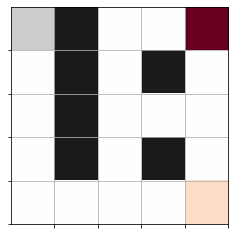

In [9]:
maze1 = np.array([[1.,0.,1.,1.,-1.],
                 [1.,0.,1.,0.,1.],
                 [1.,0.,1.,1.,1.],
                 [1.,0.,1.,0.,1.],
                 [1.,1.,1.,1.,1.]])
qmaze1 = Qmaze(maze=maze1, random_init=False, door_mode=True)
show(qmaze1)

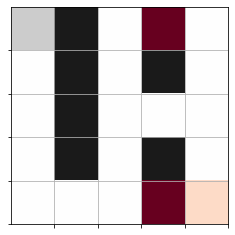

In [67]:
maze2 = np.array([[1.,0.,1.,-1.,1.],
                 [1.,0.,1.,0.,1.],
                 [1.,0.,1.,1.,1.],
                 [1.,0.,1.,0.,1.],
                 [1.,1.,1.,-1.,1.]])
qmaze2 = Qmaze(maze=maze2, random_init=False, door_mode=True, prob_door_close=1.)
show(qmaze2)

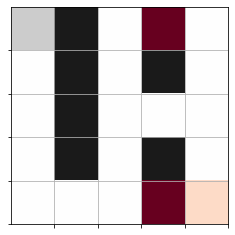

In [11]:
maze3 = np.array([[1.,0.,1.,-1.,1.],
                 [1.,0.,1.,0.,1.],
                 [1.,0.,1.,1.,1.],
                 [1.,0.,1.,0.,1.],
                 [1.,1.,1.,-1.,1.]])
p=0.1
qmaze3 = Qmaze(maze=maze3, random_init=False, door_mode=True, prob_door_close=p) 
show(qmaze3)

## Maze 1 to maze 2

In [81]:
eps_decay = 0.9
fix_seeds()
model_1 = Net(maze1.size, num_actions)
optimizer = optim.Adam(model_1.parameters())
loss_n = nn.MSELoss()
tab_loss_1, tab_reward_1, tab_win_1 = qtrain(model_1, qmaze1, 
optimizer, loss_n, n_epoch=50, max_memory=8*maze1.size, n_epoch_fit=10, name='model_parameters_1', eps_decay=eps_decay, rat_cell_0 = True)

model_2 = Net(maze2.size, num_actions)
optimizer = optim.Adam(model_2.parameters())
loss_n = nn.MSELoss()
tab_loss_2, tab_reward_2, tab_win_2 = qtrain(model_2, qmaze2, 
optimizer, loss_n, n_epoch=50, max_memory=8*maze2.size, n_epoch_fit=10, name='model_parameters_2', eps_decay=eps_decay, rat_cell_0 = True)

Epoch: 000/49 | Loss: 0.0000 | Episodes: 27 | Win count: 0 | Win rate: 0.000 | time: 0.0 seconds
Epoch: 001/49 | Loss: 3.3634 | Episodes: 22 | Win count: 1 | Win rate: 0.000 | time: 0.7 seconds
Epoch: 002/49 | Loss: 3.9231 | Episodes: 21 | Win count: 2 | Win rate: 0.000 | time: 1.2 seconds
Epoch: 003/49 | Loss: 1.5815 | Episodes: 17 | Win count: 3 | Win rate: 0.000 | time: 2.0 seconds
Epoch: 004/49 | Loss: 0.8633 | Episodes: 13 | Win count: 4 | Win rate: 0.000 | time: 2.6 seconds
Epoch: 005/49 | Loss: 0.8074 | Episodes: 10 | Win count: 5 | Win rate: 0.000 | time: 3.1 seconds
Epoch: 006/49 | Loss: 0.4713 | Episodes: 8 | Win count: 6 | Win rate: 0.000 | time: 3.4 seconds
Epoch: 007/49 | Loss: 0.3285 | Episodes: 8 | Win count: 7 | Win rate: 0.000 | time: 3.7 seconds
Epoch: 008/49 | Loss: 0.5581 | Episodes: 9 | Win count: 8 | Win rate: 0.000 | time: 4.0 seconds
Epoch: 009/49 | Loss: 0.3635 | Episodes: 8 | Win count: 9 | Win rate: 0.000 | time: 4.3 seconds
Epoch: 010/49 | Loss: 0.2557 | Epi

In [82]:
fix_seeds()
model_change = Net(maze1.size, num_actions)
optimizer = optim.Adam(model_change.parameters())
loss_n = nn.MSELoss()
tab_loss_change, tab_reward_change, tab_win_change = qtrain_change_maze(model_change, qmaze1, qmaze2, 
optimizer, loss_n, n_epoch=100, max_memory=8*maze1.size, n_epoch_fit=10, name='model_parameters_change', eps_decay=eps_decay,change=50)

Epoch: 000/99 | Loss: 0.0000 | Episodes: 27 | Win count: 0 | Win rate: 0.000 | time: 0.0 seconds
Epoch: 001/99 | Loss: 3.3634 | Episodes: 22 | Win count: 1 | Win rate: 0.000 | time: 0.5 seconds
Epoch: 002/99 | Loss: 3.9231 | Episodes: 21 | Win count: 2 | Win rate: 0.000 | time: 1.0 seconds
Epoch: 003/99 | Loss: 1.5815 | Episodes: 17 | Win count: 3 | Win rate: 0.000 | time: 1.4 seconds
Epoch: 004/99 | Loss: 0.8633 | Episodes: 13 | Win count: 4 | Win rate: 0.000 | time: 1.8 seconds
Epoch: 005/99 | Loss: 0.8074 | Episodes: 10 | Win count: 5 | Win rate: 0.000 | time: 2.0 seconds
Epoch: 006/99 | Loss: 0.4713 | Episodes: 8 | Win count: 6 | Win rate: 0.000 | time: 2.3 seconds
Epoch: 007/99 | Loss: 0.3285 | Episodes: 8 | Win count: 7 | Win rate: 0.000 | time: 2.5 seconds
Epoch: 008/99 | Loss: 0.5581 | Episodes: 9 | Win count: 8 | Win rate: 0.000 | time: 2.7 seconds
Epoch: 009/99 | Loss: 0.3635 | Episodes: 8 | Win count: 9 | Win rate: 0.000 | time: 2.9 seconds
Epoch: 010/99 | Loss: 0.2557 | Epi

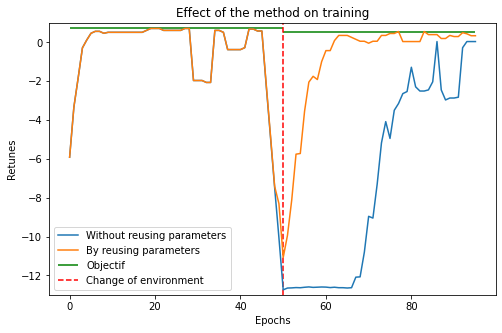

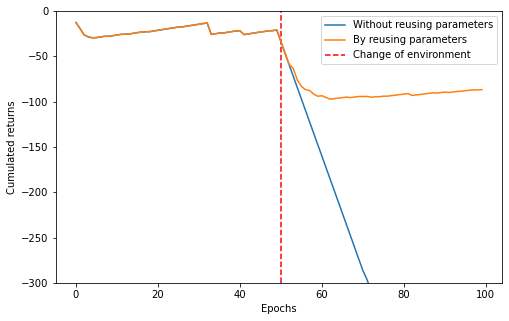

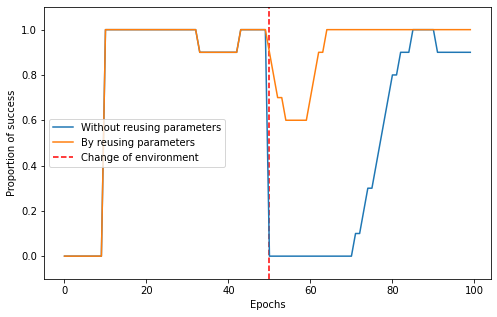

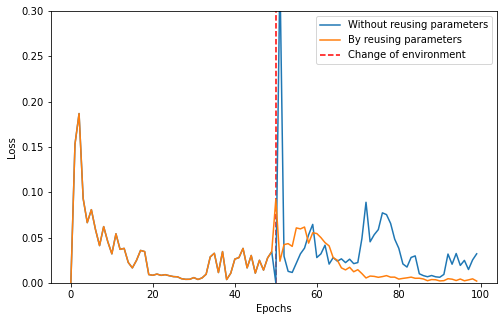

In [83]:
tab_reward_2 = np.array(tab_reward_2)
tab_reward_1 = np.array(tab_reward_1)
tab_cumulative_reward_1 = np.cumsum(tab_reward_1)
tab_cumulative_reward_2 = np.cumsum(tab_reward_2)
tab_cumulative_reward_change = np.cumsum(tab_reward_change)

plt.figure(figsize=(8,5))
convol_param = 5
tab_reward_concat = np.concatenate((tab_reward_1, tab_reward_2))
plt.plot(np.convolve(tab_reward_concat, np.ones(convol_param)/convol_param, mode='valid'), label='Without reusing parameters')
plt.plot(np.convolve(tab_reward_change, np.ones(convol_param)/convol_param, mode='valid'), label='By reusing parameters')
plt.hlines(1-7*0.04, 0, 50, label="Objectif", colors='g')
plt.hlines(1-11*0.04,50,100-convol_param, colors='g')
plt.xlabel("Epochs")
plt.ylabel("Retunes")
plt.title("Effect of the method on training")
plt.vlines(50, -13, 1, colors='r', linestyles='dashed', label="Change of environment")
plt.ylim(-13,1)
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
tab_cumulative_reward_2 += tab_cumulative_reward_1[49]
tab_cumulative_reward_concat = np.concatenate((tab_cumulative_reward_1[:50], tab_cumulative_reward_2[:50]))
plt.plot(tab_cumulative_reward_concat, label="Without reusing parameters")
plt.plot(tab_cumulative_reward_change, label="By reusing parameters")
plt.xlabel("Epochs")
plt.ylabel("Cumulated returns")
plt.vlines(50, -300, 0, colors='r', linestyles='dashed', label="Change of environment")
plt.ylim(-300,0)
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
tab_win_concat = np.concatenate((tab_win_1[:50], tab_win_2[:50]))
plt.plot(tab_win_concat, label="Without reusing parameters")
plt.plot(tab_win_change, label="By reusing parameters")
plt.xlabel("Epochs")
plt.ylabel("Proportion of success")
plt.vlines(50, -0.1, 1.1, colors='r', linestyles='dashed', label="Change of environment")
plt.ylim(-0.1,1.1)
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
tab_loss_concat = np.concatenate((tab_loss_1[:50], tab_loss_2[:50]))
plt.plot(tab_loss_concat, label="Without reusing parameters")
plt.plot(tab_loss_change, label="By reusing parameters")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.vlines(50, 0, 0.3, colors='r', linestyles='dashed', label="Change of environment")
plt.ylim(0,0.3)
plt.legend()
plt.show()

## Maze 2 to maze 3

In [88]:
eps_decay = 0.85
fix_seeds()
model_2 = Net(maze2.size, num_actions)
optimizer = optim.Adam(model_2.parameters())
loss_n = nn.MSELoss()
tab_loss_2, tab_reward_2, tab_win_2 = qtrain(model_2, qmaze2, 
optimizer, loss_n, n_epoch=50, max_memory=8*maze2.size, n_epoch_fit=10, name='model_parameters_2', eps_decay=eps_decay, rat_cell_0 = True)

model_3 = Net(maze3.size, num_actions)
optimizer = optim.Adam(model_3.parameters())
loss_n = nn.MSELoss()
tab_loss_3, tab_reward_3, tab_win_3 = qtrain(model_3, qmaze3, 
optimizer, loss_n, n_epoch=50, max_memory=8*maze3.size, n_epoch_fit=10, name='model_parameters_3', eps_decay=eps_decay, rat_cell_0 = True)

Epoch: 000/49 | Loss: 0.0000 | Episodes: 23 | Win count: 0 | Win rate: 0.000 | time: 0.0 seconds
Epoch: 001/49 | Loss: 2.5181 | Episodes: 30 | Win count: 0 | Win rate: 0.000 | time: 0.8 seconds
Epoch: 002/49 | Loss: 3.0017 | Episodes: 30 | Win count: 0 | Win rate: 0.000 | time: 1.7 seconds
Epoch: 003/49 | Loss: 5.6211 | Episodes: 24 | Win count: 0 | Win rate: 0.000 | time: 2.4 seconds
Epoch: 004/49 | Loss: 1.7233 | Episodes: 28 | Win count: 0 | Win rate: 0.000 | time: 3.5 seconds
Epoch: 005/49 | Loss: 2.9435 | Episodes: 38 | Win count: 0 | Win rate: 0.000 | time: 5.2 seconds
Epoch: 006/49 | Loss: 2.7692 | Episodes: 51 | Win count: 0 | Win rate: 0.000 | time: 6.8 seconds
Epoch: 007/49 | Loss: 1.3933 | Episodes: 57 | Win count: 0 | Win rate: 0.000 | time: 8.4 seconds
Epoch: 008/49 | Loss: 0.9593 | Episodes: 59 | Win count: 0 | Win rate: 0.000 | time: 10.3 seconds
Epoch: 009/49 | Loss: 1.2291 | Episodes: 60 | Win count: 0 | Win rate: 0.000 | time: 12.0 seconds
Epoch: 010/49 | Loss: 1.2019

In [89]:
fix_seeds()
model_change = Net(maze1.size, num_actions)
optimizer = optim.Adam(model_change.parameters())
loss_n = nn.MSELoss()
tab_loss_change, tab_reward_change, tab_win_change = qtrain_change_maze(model_change, qmaze2, qmaze3, 
optimizer, loss_n, n_epoch=100, max_memory=8*maze1.size, n_epoch_fit=10, name='model_parameters_change', eps_decay=eps_decay, change=50)

Epoch: 000/99 | Loss: 0.0000 | Episodes: 23 | Win count: 0 | Win rate: 0.000 | time: 0.0 seconds
Epoch: 001/99 | Loss: 2.5181 | Episodes: 30 | Win count: 0 | Win rate: 0.000 | time: 0.8 seconds
Epoch: 002/99 | Loss: 3.0017 | Episodes: 30 | Win count: 0 | Win rate: 0.000 | time: 1.7 seconds
Epoch: 003/99 | Loss: 5.6211 | Episodes: 24 | Win count: 0 | Win rate: 0.000 | time: 2.4 seconds
Epoch: 004/99 | Loss: 1.7233 | Episodes: 28 | Win count: 0 | Win rate: 0.000 | time: 3.3 seconds
Epoch: 005/99 | Loss: 2.9435 | Episodes: 38 | Win count: 0 | Win rate: 0.000 | time: 4.4 seconds
Epoch: 006/99 | Loss: 2.7692 | Episodes: 51 | Win count: 0 | Win rate: 0.000 | time: 6.3 seconds
Epoch: 007/99 | Loss: 1.3933 | Episodes: 57 | Win count: 0 | Win rate: 0.000 | time: 8.2 seconds
Epoch: 008/99 | Loss: 0.9593 | Episodes: 59 | Win count: 0 | Win rate: 0.000 | time: 10.6 seconds
Epoch: 009/99 | Loss: 1.2291 | Episodes: 60 | Win count: 0 | Win rate: 0.000 | time: 12.5 seconds
Epoch: 010/99 | Loss: 1.2019

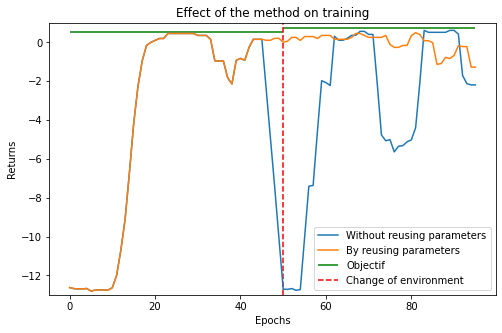

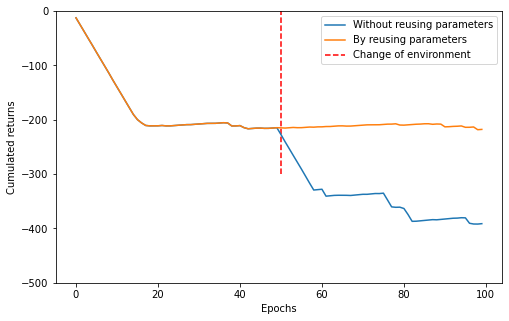

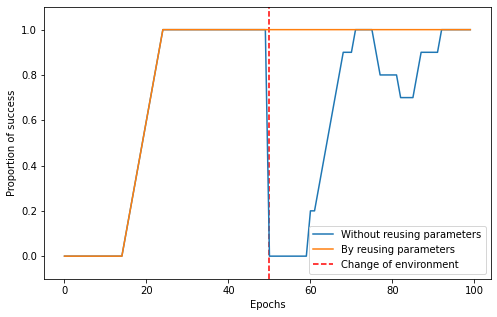

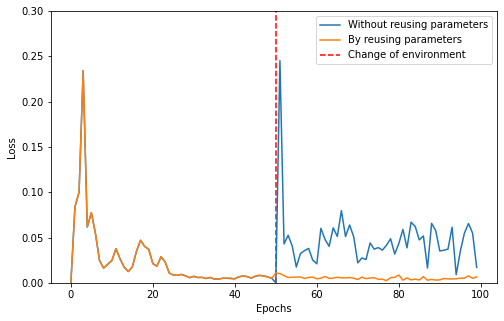

In [90]:
tab_reward_2 = np.array(tab_reward_2)
tab_reward_3 = np.array(tab_reward_3)
tab_cumulative_reward_3 = np.cumsum(tab_reward_3)
tab_cumulative_reward_2 = np.cumsum(tab_reward_2)
tab_cumulative_reward_change = np.cumsum(tab_reward_change)

plt.figure(figsize=(8,5))
convol_param = 5
tab_reward_concat = np.concatenate((tab_reward_2, tab_reward_3))
plt.plot(np.convolve(tab_reward_concat, np.ones(convol_param)/convol_param, mode='valid'), label='Without reusing parameters')
plt.plot(np.convolve(tab_reward_change, np.ones(convol_param)/convol_param, mode='valid'), label='By reusing parameters')
plt.hlines(1-7*0.04, 50, 100-convol_param, label="Objectif", colors='g')
plt.hlines(1-11*0.04,0,50, colors='g')
plt.xlabel("Epochs")
plt.ylabel("Returns")
plt.title("Effect of the method on training")
plt.vlines(50, -13, 1, colors='r', linestyles='dashed', label="Change of environment")
plt.ylim(-13,1)
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
tab_cumulative_reward_3 += tab_cumulative_reward_2[49]
tab_cumulative_reward_concat = np.concatenate((tab_cumulative_reward_2[:50], tab_cumulative_reward_3[:50]))
plt.plot(tab_cumulative_reward_concat, label="Without reusing parameters")
plt.plot(tab_cumulative_reward_change, label="By reusing parameters")
plt.xlabel("Epochs")
plt.ylabel("Cumulated returns")
plt.vlines(50, -300, 0, colors='r', linestyles='dashed', label="Change of environment")
plt.ylim(-500,0)
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
tab_win_concat = np.concatenate((tab_win_2[:50], tab_win_3[:50]))
plt.plot(tab_win_concat, label="Without reusing parameters")
plt.plot(tab_win_change, label="By reusing parameters")
plt.xlabel("Epochs")
plt.ylabel("Proportion of success")
plt.vlines(50, -0.1, 1.1, colors='r', linestyles='dashed', label="Change of environment")
plt.ylim(-0.1,1.1)
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
tab_loss_concat = np.concatenate((tab_loss_2[:50], tab_loss_3[:50]))
plt.plot(tab_loss_concat, label="Without reusing parameters")
plt.plot(tab_loss_change, label="By reusing parameters")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.vlines(50, 0, 0.3, colors='r', linestyles='dashed', label="Change of environment")
plt.ylim(0,0.3)
plt.legend()
plt.show()